In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_37675_R')

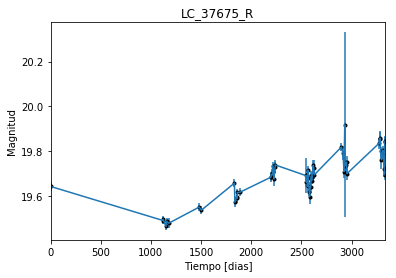

In [2]:
data = np.genfromtxt('LC_37675_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_37675_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

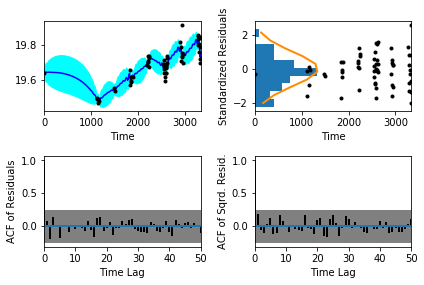

In [5]:
sample.assess_fit()

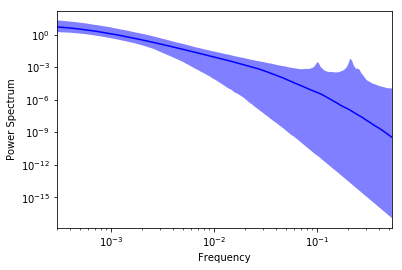

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_37675_R')

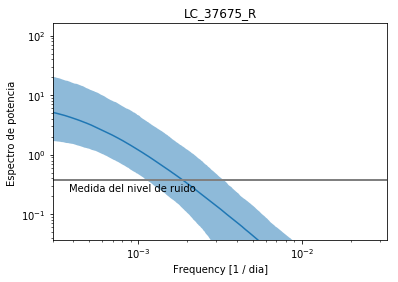

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_37675_R')

Text(0.5,1,'Prediccion , valor esperado LC_37675_R')

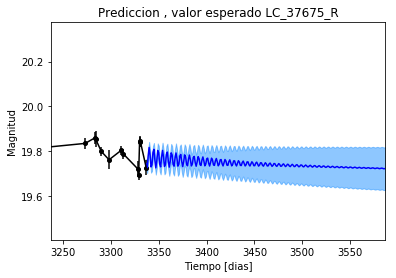

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_37675_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_37675_R')

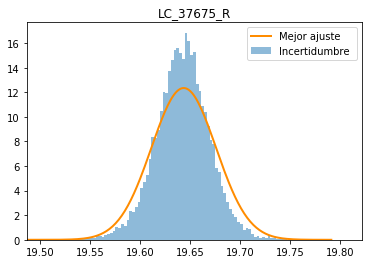

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_37675_R')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_R')

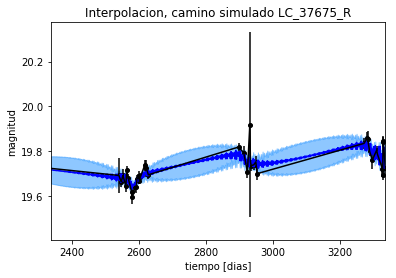

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_R')

Text(0.5,1,'Interpolacion, camino simulado LC_37675_R')

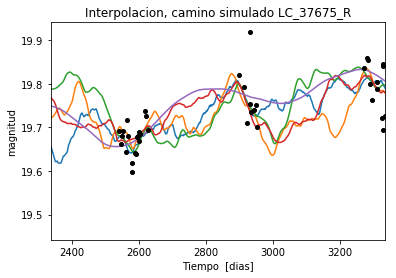

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_37675_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 922.24982263
Median: 0.0124174164543
Standard deviation: 0.197683528879
68% credibility interval: [ 0.00199781  0.17452706]
95% credibility interval: [  4.52987661e-04   7.83007241e-01]
99% credibility interval: [  3.21298969e-04   1.00532655e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 394.39479743
Median: 0.00561358305681
Standard deviation: 0.0976172173023
68% credibility interval: [ 0.00079972  0.04441995]
95% credibility interval: [ 0.0003272   0.31059622]
99% credibility interval: [  3.05012391e-04   7.12587272e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 420.752622236
Median: 0.0684629588273
Standard de

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 519.161280346
Median: 132.538366472
Standard deviation: 2.13347433475
68% credibility interval: [ 130.48692212  134.15136614]
95% credibility interval: [ 127.99409406  136.98088316]
99% credibility interval: [ 126.12489015  138.61517179]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 244.964675777
Median: 1.14911118443
Standard deviation: 2.39441398752
68% credibility interval: [ 0.13676468  4.56678556]
95% credibility interval: [ 0.02847774  8.22866086]
99% credibility interval: [  0.01381604  11.31237667]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 331.327516795
Median: 1.8302102174
Standard deviation: 11.2196256445
68% credibility interval: [  0.08265053  13.81153527]
95% credibility interval: [  3.23899555e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 9.30102292916e-49
Standard deviation: 1.46073134472e+108
68% credibility interval: [  3.55220523e-138   6.05713881e-013]
95% credibility interval: [  1.15956318e-189   9.06593456e+000]
99% credibility interval: [  5.53908860e-197   8.00487673e+068]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2237.04779081
Median: 19.6550322556
Standard deviation: 0.0522153330579
68% credibility interval: [ 19.60695663  19.7025139 ]
95% credibility interval: [ 19.55123295  19.75606795]
99% credibility interval: [ 19.49854452  19.80868608]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1439.1701466
Median: 0.123456068811
Standard deviation: 0.26816172648
68% credibility interval: [ 0.          0.47079792]
95% credibility interval: [ 0.          0.93661426]
99% credibility interval: [ 0.          1.04464361]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1439.1701466
Median: 0.123456068811
Standard deviation: 0.26816172648
68% credibility interval: [ 0.          0.47079792]
95% credibility interval: [ 0.          0.93661426]
99% credibility interval: [ 0.          1.04464361]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1310.63499638
Median: 0.0
Standard deviation: 0.000212376901785
68% credibil

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 519.161280346
Median: 132.538366472
Standard deviation: 2.13347433475
68% credibility interval: [ 130.48692212  134.15136614]
95% credibility interval: [ 127.99409406  136.98088316]
99% credibility interval: [ 126.12489015  138.61517179]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3017.56248433
Median: 0.0105561742012
Standard deviation: 0.0100346499119
68% credibility interval: [ 0.00665513  0.01756861]
95% credibility interval: [ 0.00450298  0.03536485]
99% credibility interval: [ 0.00358639  0.06438478]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 207.533284087
Median: 1.32811840799
Standard deviation: 0.250240556227
68% credibility interval: [ 1.07457074  1.58826875]
95% credibility interval: [ 0.85561739  1.83731431]
99% credibility interval: [ 0.74001026  1.95310126]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 792.22599469
Median: 0.00211136651464
Standard deviation: 0.174080215988
68% credibility interval: [  1.87579359e-05   5.23738225e-02]
95% credibility interval: [  1.65161328e-07   5.87084328e-01]
99% credibility interval: [  5.21196023e-74   1.14923113e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 922.24982263
Median: (-0.078020928619-0.171841818289j)
Standard deviation: 2.09324852847
68% credibility interval: [-1.09658587-6.51979153j -0.01255260-3.0374806j ]
95% credibility interval: [ -4.91977959e+00+0.j          -2.84620542e-03-1.62710681j]
99% credibility interval: [ -6.31665299e+00+0.j         -2.01878096e-03-0.5327227j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 394.39479743
Median: (-0.0352711825832+0j)
Standard deviation: 1.79307437757
68% credibility interval: [-0.27909877+0.05791136j -0.00502479+0.j        ]
95% credibility interval: [-1.95153359+3.54445389j -0.00205585+0.j        ]
99% credibility interval: [ -4.47731788e+00+6.22103756j  -1.91644937e-03+0.64887622j]
Posterior summary for paramete